### Q1

In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files=["data/datajson/geoLondonSep2022_1.json",
       "data/datajson/geoLondonSep2022_2.json",
       "data/datajson/geoLondonSep2022_3.json", 
       "data/datajson/geoLondonSep2022_4.json", 
       "data/datajson/geoLondonSep2022_5.json"]
 
def merge_JsonFiles(filename):
    result = list()
    for f1 in filename:
        with open(f1, 'r', encoding='utf-8') as infile:
            result.extend(json.load(infile)) 
    with open('Merged_Json.json', 'w') as output_file:
        json.dump(result, output_file)
 
merge_JsonFiles(files)
 
tweet_df = pd.read_json('Merged_Json.json')

In [4]:
tweets_dfs = pd.read_json('Merged_Json.json')
tweets_dfs

_id                               date  \
0      1565429028747616256  {'$date': '2022-09-01T19:58:59Z'}   
1      1565428982660603907  {'$date': '2022-09-01T19:58:48Z'}   
2      1565428290017443846  {'$date': '2022-09-01T19:56:03Z'}   
3      1565427593851158528  {'$date': '2022-09-01T19:53:17Z'}   
4      1565425981246115842  {'$date': '2022-09-01T19:46:52Z'}   
...                    ...                                ...   
13187  1575580078368378881  {'$date': '2022-09-29T20:15:38Z'}   
13188  1575579146775777280  {'$date': '2022-09-29T20:11:56Z'}   
13189  1575578499121041408  {'$date': '2022-09-29T20:09:21Z'}   
13190  1575577168826232832  {'$date': '2022-09-29T20:04:04Z'}   
13191  1575576182510141440  {'$date': '2022-09-29T20:00:09Z'}   

           screen_name  qualityScore  \
0         loststoryart      0.554386   
1      amovivirlavida_      0.590283   
2          NR_Boutique      0.591719   
3       grahamsrenwick      0.592131   
4             Nickyfar      0.664139   
...                ...           ...   
13187        tracymayh      0.588676   
13188            z_mie      0.569792   
13189            Djyeo      0.592224   
13190  CellarDoorChris      0.607921   
13191      gretakaviya      0.608710   

                                                    text  \
0      Just posted a photo @ London, United Kingdom h...   
1      Just posted a photo @ London, United Kingdom h...   
2      Just posted a photo @ Eliza Jane Howell https:...   
3      Just posted a photo @ London, Unιted Kingdom h...   
4      A fun day murdering in London Town for the fir...   
...                                                  ...   
13187  Just posted a photo @ The Langham, London http...   
13188  I'm at Viet Food in London, Greater London htt...   
13189  Just posted a photo @ London, United Kingdom h...   
13190  Drinking a Studio Lager by @SignatureBrew at @...   
13191  Illustration 1 \n\nMuse: @uchjn \n// @pinteres...   

                           url  \
0      https://t.co/Ejo6POjL2A   
1      https://t.co/0EJaicfKj4   
2      https://t.co/SqygvueJN5   
3      https://t.co/FIROKbxbXF   
4      https://t.co/bPhORACxRM   
...                        ...   
13187  https://t.co/bdcKcb6Qpq   
13188                     None   
13189  https://t.co/qWab8W8sbm   
13190  https://t.co/WsmHN08X3O   
13191                     None   

                                             description  listed_count  \
0                                         Artist/Dreamer             0   
1      Graphic Designer & Influencer | 👻 - @ amovivir...             9   
2      Mother of the Bride & Groom Outfits and Matchi...            57   
3      Designer, Dreamer, Creator, Artist @7490REN. L...             5   
4      Actress.Singer.Muse.Mischief.Bad Girl forever....            48   
...                                                  ...           ...   
13187  Tracy May Beauty. Guest Speaker. Educator. Ski...             2   
13188                             🈚️ 変わらずないよずって｜山崎賢人大好き😘            21   
13189  Actor|Commercial Model| Presenter. Coffee Conn...           224   
13190  Music, craft beer, wrestling & video game love...            27   
13191  God is Love • Mood Posts 🌙🔮✨The Neon Nefertiti...             4   

                            user_created  geo_enabled  ...  \
0      {'$date': '2014-09-06T16:58:45Z'}         True  ...   
1      {'$date': '2012-02-06T20:32:30Z'}         True  ...   
2      {'$date': '2012-04-20T19:10:02Z'}         True  ...   
3      {'$date': '2012-08-24T21:23:58Z'}         True  ...   
4      {'$date': '2009-02-06T13:18:51Z'}         True  ...   
...                                  ...          ...  ...   
13187  {'$date': '2009-10-26T12:16:17Z'}         True  ...   
13188  {'$date': '2010-09-02T16:55:48Z'}         True  ...   
13189  {'$date': '2009-01-31T20:52:54Z'}         True  ...   
13190  {'$date': '2009-03-16T22:06:02Z'}         True  ...   
13191  {'$date': '2009-05-03T13:22:14Z'}         True  ...  

In [5]:
# Distance calculation between two points
def compute_distance(location_1, location_2):
    long_1, lat_1, long_2, lat_2 = map(np.radians, [location_1[0], location_1[1], location_2[0], location_2[1]]) 
    haversine = np.sin((lat_2 - lat_1) / 2) ** 2 + np.cos(lat_1) * np.cos(lat_2) * np.sin((long_2 - long_1) / 2) ** 2  
    return 6371 * 2 * np.arcsin(np.sqrt(haversine))

london_coordinates = [-0.563, 51.2C61318, 0.28036, 51.686031]

# For generating grid details
rows = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [london_coordinates[0], london_coordinates[3]])).astype(int)
print('Number of rows:' , rows)

columns = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [london_coordinates[2], london_coordinates[1]])).astype(int)
print('Number of columns: ',columns)

noofgrids = int(rows * columns)
print('Number of grids: ',noofgrids)

# Plotting the grid 
grids = np.zeros((rows, columns), dtype = int)

for coordinate in tweets_dfs['coordinates']:
    row_index = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [london_coordinates[0], coordinate[1]])).astype(int)
    col_index = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [coordinate[0], london_coordinates[1]])).astype(int)
    grids[row_index, col_index] += 1
    

no_of_tweets = np.ravel(grids)
grid_col = 'Grid'
no_of_tweets_count = 'Tweets count'
no_of_tweets_dfs = pd.DataFrame({grid_col: np.arange(1, noofgrids + 1), no_of_tweets_count: no_of_tweets})  # Create a DataFrame containing the number of tweets per grid.



Number of rows: 48
Number of columns:  59
Number of grids:  2832


C:\Users\gandh\AppData\Local\Temp\ipykernel_18328\1787253862.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 50)


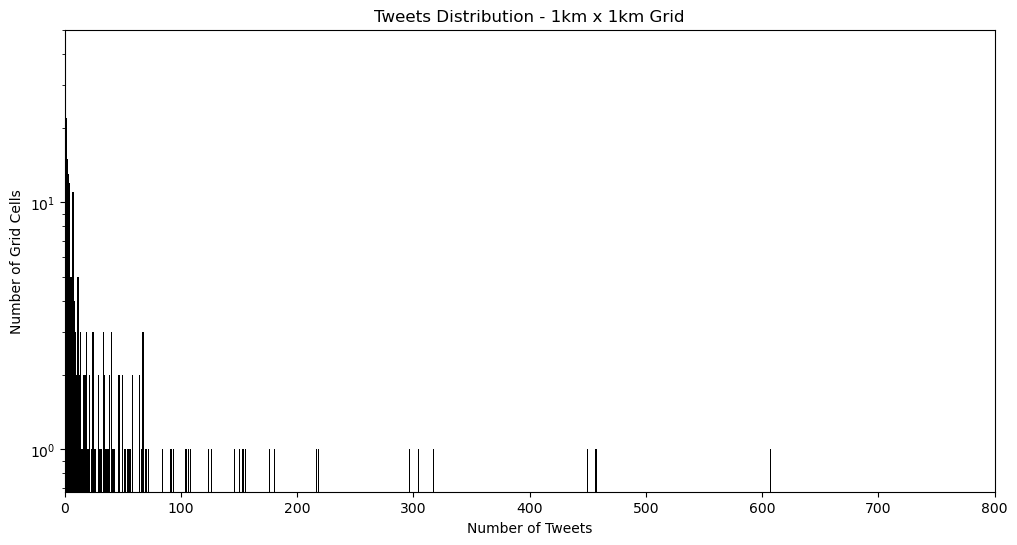

In [6]:
# Visualize the distribution using a histogram
plt.figure(figsize=(12, 6))
plt.hist(no_of_tweets, bins = np.max(no_of_tweets), log = True, color='black') #, edgecolor='black')
plt.title('Tweets Distribution - 1km x 1km Grid')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Grid Cells')
plt.ylim(0, 50)
plt.xlim(0, 800)
plt.show()

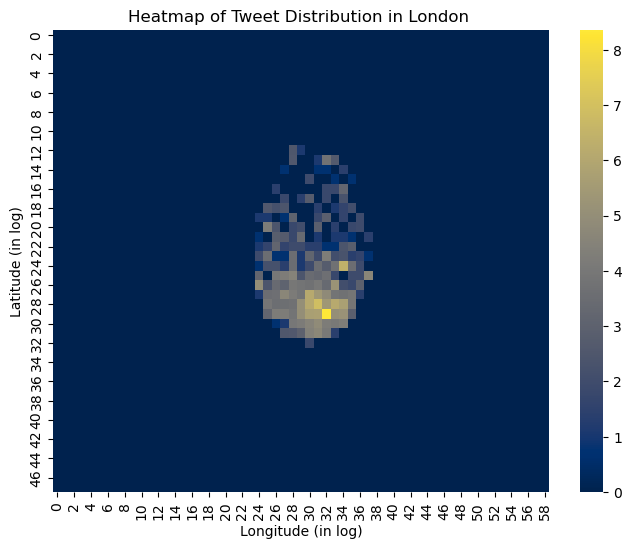

In [22]:
# Create heatmap of tweet distribution
plt.figure(figsize=(8, 6))

grids_map = np.log(grids, out = np.zeros_like(grids, dtype = float), where = (grids != 0))
sns.heatmap(grids_map, cmap='cividis') 
plt.title('Heatmap of Tweet Distribution in London ')
plt.xlabel('Longitude (in log)')
plt.ylabel('Latitude (in log)')
plt.show()

In [8]:
# Compute statistics Provide statistics of the data (total tweets, how many are on the cells, and how it is distributed etc.)
# and interpret the statistics – what does this mean?

total_no_of_tweets = len(tweets_dfs)
tweets_per_cell = grids.flatten()
per_cell_mean = np.mean(tweets_per_cell)
per_cell_median = np.median(tweets_per_cell)
per_cell_max = np.max(tweets_per_cell)
per_cell_min = np.min(tweets_per_cell)

print("Total number of tweets:", total_no_of_tweets)
print("Maximum number of tweets in a grid cell:", per_cell_max)
print("Minimum number of tweets in a grid cell:", per_cell_min)
print("Average number of tweets per grid cell:", per_cell_mean)
print("Median number of tweets per grid cell:", per_cell_median)


Total number of tweets: 13192
Maximum number of tweets in a grid cell: 4257
Minimum number of tweets in a grid cell: 0
Average number of tweets per grid cell: 4.65819209039548
Median number of tweets per grid cell: 0.0


### Q2

In [11]:
import pandas as pd
from collections import Counter

# Load the tweet data as Pandas DataFrames
background_df = pd.read_json('data/credModelFiles/bgQuality.json', lines=True)
high_quality_df = pd.read_json('data/credModelFiles/highQuality.json', lines=True)
low_quality_df = pd.read_json('data/credModelFiles/lowQuality.json', lines=True)


# Calculate term frequencies and document frequencies
def calculate_term_document_frequencies(tweets_df):
    frequency_terms = Counter()
    frequency_doc = Counter()

    for index, row in tweets_df.iterrows():
        text = ' '.join(row['text'])
        terms = text.split() 
        unique_terms = set(terms)

        # Increment term frequencies for each term in the tweet
        frequency_terms.update(terms)

        # Increment document frequencies for each unique term in the tweet
        frequency_doc.update(unique_terms)

    return frequency_terms, frequency_doc

# Calculate term frequencies and document frequencies for each dataset
HighQ_term_frequency, HighQ_doc_frequency = calculate_term_document_frequencies(high_quality_df)
LowQ_term_frequency, LowQ_doc_frequency = calculate_term_document_frequencies(low_quality_df)
BckgrndQ_term_frequency, BckgrndQ_Doc_frequency = calculate_term_document_frequencies(background_df)

# Calculate likelihood ratios
def calculate_likelihood(tf_model, F_model, tf_bg, F_bg):
    tf_model_sum = sum(tf_model.values())
    F_model_sum = sum(F_model.values())
    tf_bg_sum = sum(tf_bg.values())
    F_bg_sum = sum(F_bg.values())
    return (tf_model_sum / F_model_sum) / (tf_bg_sum / F_bg_sum)

# Define thresholds 
HighQ_threshold = 2.0
LowQ_threshold = 2.0

# Calculate likelihood ratios
RHQ = calculate_likelihood(HighQ_term_frequency, HighQ_doc_frequency, BckgrndQ_term_frequency, BckgrndQ_Doc_frequency)
RLQ = calculate_likelihood(LowQ_term_frequency, LowQ_doc_frequency, BckgrndQ_term_frequency, BckgrndQ_Doc_frequency)

# Define newsworthy scores based on likelihood ratios and thresholds
SHQ = {term: RHQ if RHQ >= HighQ_threshold else 0 for term in HighQ_term_frequency}
SLQ = {term: RLQ if RLQ >= LowQ_threshold else 0 for term in LowQ_term_frequency}

# Calculate newsworthy scores for each tweet
def calculate_newsworthy_score(text, quality_score, scores):
    terms = text.split()
    return sum(scores.get(term, 0) * quality_score for term in terms)

high_quality_df['newsworthy_score'] = high_quality_df.apply(lambda row: calculate_newsworthy_score(row['text'], row['qualityS'], SHQ), axis=1)
low_quality_df['newsworthy_score'] = low_quality_df.apply(lambda row: calculate_newsworthy_score(row['text'], row['qualityS'], SLQ), axis=1)

### Q3

In [12]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# Functions for data preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]
    return tokens

# Function to calculate newsworthiness scores
def calculate_newsworthiness_score(text, scores, threshold):
    tokens = preprocess_text(text)
    score = sum(scores.get(token, 0) for token in tokens)
    return score >= threshold

# Calculate term frequencies (tf) and document frequencies (F) for each dataset
def calculate_term_document_frequencies(tweets_df):
    frequency_term = Counter()
    frequency_doc = Counter()

    for index, row in tweets_df.iterrows():
        tokens = preprocess_text(' '.join(row['text']))
        unique_terms = set(tokens)
        frequency_term.update(tokens)
        frequency_doc.update(unique_terms)

    return frequency_term, frequency_doc

# Calculate term and document frequencies for each dataset
bckgrnd_frequency_term, bckgrnd_frequency_doc = calculate_term_document_frequencies(background_df)
highquality_frequency_term, highquality_frequency_doc = calculate_term_document_frequencies(high_quality_df)
lowquality_frequency_term, lowquality_frequency_doc = calculate_term_document_frequencies(low_quality_df)

# Calculate likelihood ratios
RLQ = {}
for term, freq in lowquality_frequency_term.items():
    bckgrnd_frequency = bckgrnd_frequency_term.get(term, 0) 
    if bckgrnd_frequency != 0:
        RLQ[term] = (freq / lowquality_frequency_doc[term]) / (bckgrnd_frequency / bckgrnd_frequency_doc[term])
    else:
        RLQ[term] = 0 
        
RHQ = {}
for term, freq in highquality_frequency_term.items():
    bckgrnd_frequency = bckgrnd_frequency_term.get(term, 0) 
    if bckgrnd_frequency != 0:
        RHQ[term] = (freq / highquality_frequency_doc[term]) / (bckgrnd_frequency / bckgrnd_frequency_doc[term])
    else:
        RHQ[term] = 0  

# Define thresholds for considering terms as newsworthy
thresholds = [0.5, 1, 2, 3, 4] 
for threshold in thresholds:
    high_quality_df['newsworthiness'] = high_quality_df['text'].apply(lambda text: calculate_newsworthiness_score(text, RHQ, threshold)).astype(int)
    low_quality_df['newsworthiness'] = low_quality_df['text'].apply(lambda text: calculate_newsworthiness_score(text, RLQ, threshold)).astype(int)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Load the geo-tagged tweet dataset
tweets_dataset = pd.read_json('Merged_Json.json')

# Function to calculate newsworthiness scores
def calculate_newsworthiness_score(text, scores, threshold):
    tokens = preprocess_text(text)
    score = sum(scores.get(token, 0) for token in tokens)
    return score >= threshold


# Functions for data preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    processed_text = ' '.join(tokens)
    return processed_text

tweets_dataset['processed_text'] = tweets_dataset['text'].apply(preprocess_text)

def calculate_newsworthiness(tweet_text):
    # Assuming you have defined a function to calculate newsworthiness scores
    return calculate_newsworthiness_score(tweet_text, RHQ, threshold)

# Calculate newsworthiness scores for each tweet
tweets_dataset['newsworthiness_score'] = tweets_dataset['processed_text'].apply(calculate_newsworthiness)

# Create a GeoDataFrame from the tweet data
tweets_dataset[['longitude', 'latitude']] = tweets_dataset['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))
geometry = [Point(xy) for xy in zip(tweets_dataset['longitude'], tweets_dataset['latitude'])]
geo_data = gpd.GeoDataFrame(tweets_dataset, geometry=geometry)


tweets_dataset

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


_id                               date  \
0      1565429028747616256  {'$date': '2022-09-01T19:58:59Z'}   
1      1565428982660603907  {'$date': '2022-09-01T19:58:48Z'}   
2      1565428290017443846  {'$date': '2022-09-01T19:56:03Z'}   
3      1565427593851158528  {'$date': '2022-09-01T19:53:17Z'}   
4      1565425981246115842  {'$date': '2022-09-01T19:46:52Z'}   
...                    ...                                ...   
13187  1575580078368378881  {'$date': '2022-09-29T20:15:38Z'}   
13188  1575579146775777280  {'$date': '2022-09-29T20:11:56Z'}   
13189  1575578499121041408  {'$date': '2022-09-29T20:09:21Z'}   
13190  1575577168826232832  {'$date': '2022-09-29T20:04:04Z'}   
13191  1575576182510141440  {'$date': '2022-09-29T20:00:09Z'}   

           screen_name  qualityScore  \
0         loststoryart      0.554386   
1      amovivirlavida_      0.590283   
2          NR_Boutique      0.591719   
3       grahamsrenwick      0.592131   
4             Nickyfar      0.664139   
...                ...           ...   
13187        tracymayh      0.588676   
13188            z_mie      0.569792   
13189            Djyeo      0.592224   
13190  CellarDoorChris      0.607921   
13191      gretakaviya      0.608710   

                                                    text  \
0      Just posted a photo @ London, United Kingdom h...   
1      Just posted a photo @ London, United Kingdom h...   
2      Just posted a photo @ Eliza Jane Howell https:...   
3      Just posted a photo @ London, Unιted Kingdom h...   
4      A fun day murdering in London Town for the fir...   
...                                                  ...   
13187  Just posted a photo @ The Langham, London http...   
13188  I'm at Viet Food in London, Greater London htt...   
13189  Just posted a photo @ London, United Kingdom h...   
13190  Drinking a Studio Lager by @SignatureBrew at @...   
13191  Illustration 1 \n\nMuse: @uchjn \n// @pinteres...   

                           url  \
0      https://t.co/Ejo6POjL2A   
1      https://t.co/0EJaicfKj4   
2      https://t.co/SqygvueJN5   
3      https://t.co/FIROKbxbXF   
4      https://t.co/bPhORACxRM   
...                        ...   
13187  https://t.co/bdcKcb6Qpq   
13188                     None   
13189  https://t.co/qWab8W8sbm   
13190  https://t.co/WsmHN08X3O   
13191                     None   

                                             description  listed_count  \
0                                         Artist/Dreamer             0   
1      Graphic Designer & Influencer | 👻 - @ amovivir...             9   
2      Mother of the Bride & Groom Outfits and Matchi...            57   
3      Designer, Dreamer, Creator, Artist @7490REN. L...             5   
4      Actress.Singer.Muse.Mischief.Bad Girl forever....            48   
...                                                  ...           ...   
13187  Tracy May Beauty. Guest Speaker. Educator. Ski...             2   
13188                             🈚️ 変わらずないよずって｜山崎賢人大好き😘            21   
13189  Actor|Commercial Model| Presenter. Coffee Conn...           224   
13190  Music, craft beer, wrestling & video game love...            27   
13191  God is Love • Mood Posts 🌙🔮✨The Neon Nefertiti...             4   

                            user_created  geo_enabled  ...   place_country  \
0      {'$date': '2014-09-06T16:58:45Z'}         True  ...  United Kingdom   
1      {'$date': '2012-02-06T20:32:30Z'}         True  ...  United Kingdom   
2      {'$date': '2012-04-20T19:10:02Z'}         True  ...  United Kingdom   
3      {'$date': '2012-08-24T21:23:58Z'}         True  ...  United Kingdom   
4      {'$date': '2009-02-06T13:18:51Z'}         True  ...  United Kingdom   
...                                  ...          ...  ...             ...   
13187  {'$date': '2009-10-26T12:16:17Z'}         True  ...  United Kingdom   
13188  {'$date': '2010-09-02T16:55:48Z'}         True  ...  United Kingdom   
13189  {'$date': '2009-01-31T20:52:54Z'}

In [14]:
tweets_data = tweets_dataset.copy()

# Tweets with high scores
high_score = 0.75  # Define a threshold for high scores
high_score_tweets = tweets_data[tweets_data['newsworthiness_score'] > high_score]
print("\nNumber of Tweets with High Newsworthiness Scores:", len(high_score_tweets))
print("Example of High Score Tweets:")
print(high_score_tweets[['text', 'newsworthiness_score']].head())

# Tweets with low scores
low_score = 0.25  # Define a threshold for low scores
low_score_tweets = tweets_data[tweets_data['newsworthiness_score'] < low_score]
print("\nNumber of Tweets with Low Newsworthiness Scores:", len(low_score_tweets))
print("Example of Low Score Tweets:")
print(low_score_tweets[['text', 'newsworthiness_score']].head())




Number of Tweets with High Newsworthiness Scores: 5176
Example of High Score Tweets:
                                                 text  newsworthiness_score
4   A fun day murdering in London Town for the fir...                  True
6   ‘I’m stockpiling energy.’ ! Great idea @ Londo...                  True
9   It’s was a fun ride  #bmwm4 #m4 #bmw @ London,...                  True
14  I'm at @MyPlaceSoho in London, Soho https://t....                  True
15  At the Beauty And The Geek UK screening with @...                  True

Number of Tweets with Low Newsworthiness Scores: 8016
Example of Low Score Tweets:
                                                text  newsworthiness_score
0  Just posted a photo @ London, United Kingdom h...                 False
1  Just posted a photo @ London, United Kingdom h...                 False
2  Just posted a photo @ Eliza Jane Howell https:...                 False
3  Just posted a photo @ London, Unιted Kingdom h...                 False

Mean Newsworthiness Score: 0.39235900545785324
Median Newsworthiness Score: 0.0


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


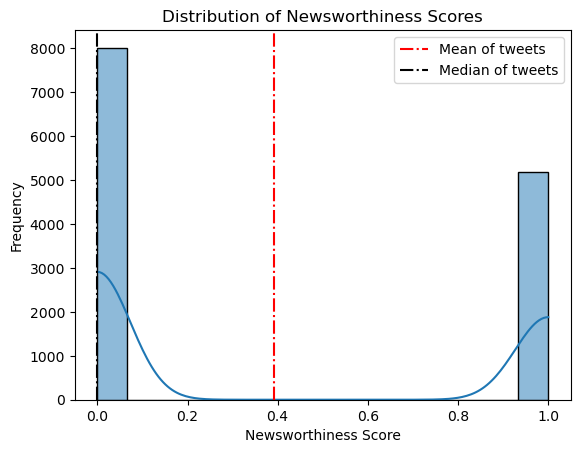

_id                               date     screen_name  \
4      1565425981246115842  {'$date': '2022-09-01T19:46:52Z'}        Nickyfar   
6      1565423227639369730  {'$date': '2022-09-01T19:35:56Z'}     DavidAdeola   
9      1565421362734415873  {'$date': '2022-09-01T19:28:31Z'}  richardwharram   
14     1565417878337232898  {'$date': '2022-09-01T19:14:40Z'}        Sausruqo   
15     1565417544617721856  {'$date': '2022-09-01T19:13:21Z'}           IET95   
...                    ...                                ...             ...   
13181  1575582137381634048  {'$date': '2022-09-29T20:23:49Z'}     gretakaviya   
13183  1575581600036704257  {'$date': '2022-09-29T20:21:40Z'}   amandaaprado_   
13185  1575581341542129665  {'$date': '2022-09-29T20:20:39Z'}       pompeyrod   
13186  1575580335525724160  {'$date': '2022-09-29T20:16:39Z'}        Trude103   
13191  1575576182510141440  {'$date': '2022-09-29T20:00:09Z'}     gretakaviya   

       qualityScore                                               text  \
4          0.664139  A fun day murdering in London Town for the fir...   
6          0.608750  ‘I’m stockpiling energy.’ ! Great idea @ Londo...   
9          0.570968  It’s was a fun ride  #bmwm4 #m4 #bmw @ London,...   
14         0.607887  I'm at @MyPlaceSoho in London, Soho https://t....   
15         0.571515  At the Beauty And The Geek UK screening with @...   
...             ...                                                ...   
13181      0.608808  Illustration 2 \n\nMuse: unknown (please tag h...   
13183      0.570175  ‘Be happy for this\nmoment, this moment is\nyo...   
13185      0.603221  Lovely evening with friends @bodyhackuk @hamya...   
13186      0.609647  Fresh faced, fancy free, life is on the up  \n...   
13191      0.608710  Illustration 1 \n\nMuse: @uchjn \n// @pinteres...   

                           url  \
4      https://t.co/bPhORACxRM   
6      https://t.co/fnTKOWGANm   
9      https://t.co/wujmeJG8iA   
14     https://t.co/XrUo9mwEcK   
15                        None   
...                        ...   
13181                     None   
13183                     None   
13185                     None   
13186                     None   
13191                     None   

                                             description  listed_count  \
4      Actress.Singer.Muse.Mischief.Bad Girl forever....            48   
6      Author, Speaker, Founder of the TheGatekeeper,...             9   
9                                                                    6   
14     Mechanical Engineer 👷 🛠💻📐\n\nBorn in London, U...            61   
15                            Features Writer at The Sun             5   
...                                                  ...           ...   
13181  God is Love • Mood Posts 🌙🔮✨The Neon Nefertiti...             4   
13183                                   24 years. London             4   
13185  Film & TV industry Exec. Producer, Financier, ...            62   
13186  Director of Player Development Cosmopolitan of...            58   
13191  God is Love • Mood Posts 🌙🔮✨The Neon Nefertiti...             4   

                            user_created  geo_enabled  ...   place_country  \
4      {'$date': '2009-02-06T13:18:51Z'}         True  ...  United Kingdom   
6      {'$date': '2009-05-21T17:48:21Z'}         True  ...  United Kingdom   
9      {'$date': '2009-02-25T10:49:28Z'}         True  ...  United Kingdom   
14     {'$date': '2016-04-13T08:48:30Z'}         True  ...  United Kingdom   
15     {'$date': '2016-08-15T00:34:17Z'}         True  ...  United Kingdom   
...                                  ...          ...  ...             ...   
13181  {'$date': '2009-05-03T13:22:14Z'}         True  ...  United Kingdom   
13183  {'$date': '2011-05-26T23:00:22Z'}         True  ...  United Kingdom   
13185  {'$date': '2008-12-02T12:22:27Z'}         True  ...  United Kingdom   
13186  {'$date': '2009-02-21T22:56:02Z'}         True  ...  United Kingdom   
13191

In [15]:

# Calculate the mean and median of newsworthiness scores
mean_value_tweets = tweets_data['newsworthiness_score'].mean()
print("Mean Newsworthiness Score:", mean_value_tweets)

median_value_tweets = tweets_data['newsworthiness_score'].median()
print("Median Newsworthiness Score:", median_value_tweets)

# Visualize the distribution of newsworthiness scores
sns.histplot(tweets_data['newsworthiness_score'], kde=True)
plt.title('Distribution of Newsworthiness Scores')
plt.axvline(x=mean_value_tweets, linestyle='-.', label='Mean of tweets', color='red')
plt.axvline(x=median_value_tweets, linestyle='-.', label='Median of tweets',color='Black')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# remove tweets with low newsworthy scores
threshold = tweets_data['newsworthiness_score'].mean()

# Filter out tweets with low newsworthy scores
unwanted_tweets = tweets_data[tweets_data['newsworthiness_score'] >= threshold]
unwanted_tweets

count     13192
unique        2
top       False
freq       8016
Name: newsworthiness_score, dtype: object


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


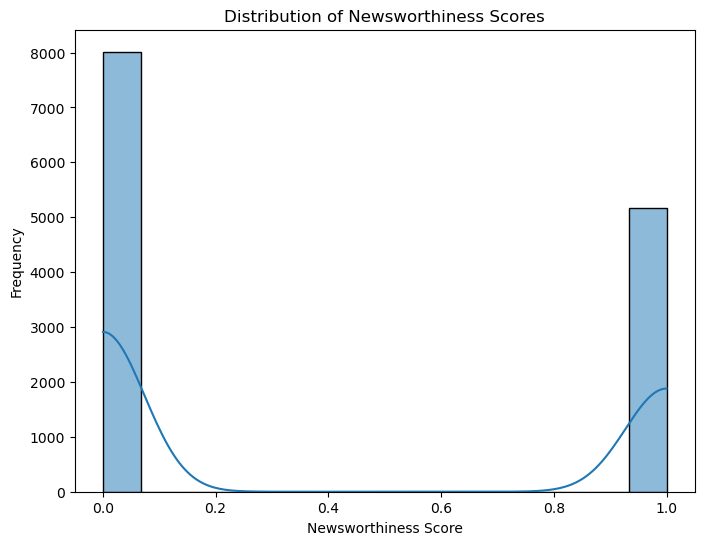


Justifying the threshold:
The threshold is like a dividing line that sorts tweets into two groups – highly newsworthy and less newsworthy. This decision comes from carefully looking at how newsworthiness scores are spread out.


In [16]:
print(tweets_dataset['newsworthiness_score'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(tweets_dataset['newsworthiness_score'], kde=True)
plt.title("Distribution of Newsworthiness Scores")
plt.xlabel("Newsworthiness Score")
plt.ylabel("Frequency")
plt.show()

# Set a threshold for separating high and low 
threshold = 0.5 

# Filter tweets with high and low scores
high_newsworthy_score = tweets_dataset[tweets_dataset['newsworthiness_score'] >= threshold]
low_newsworthy_score = tweets_dataset[tweets_dataset['newsworthiness_score'] < threshold]

# Justify the threshold choice
print("\nJustifying the threshold:")
print("The threshold is like a dividing line that sorts tweets into two groups – highly newsworthy and less newsworthy. This decision comes from carefully looking at how newsworthiness scores are spread out.")


In [17]:
# Calculate the total number of tweets
no_of_tweets = len(tweets_dataset)

# Determine the distribution of newsworthiness scores
newsworthiness = tweets_dataset['newsworthiness_score'].value_counts()

# Set a threshold 
threshold = 0.5

# Count the number of tweets above and below the threshold
high_newsworthy_tweets = tweets_dataset[tweets_dataset['newsworthiness_score'] >= threshold]
low_newsworthy_tweets = tweets_dataset[tweets_dataset['newsworthiness_score'] < threshold]

# Calculate the percentage of removed tweets
percent_of_removed_tweets = len(low_newsworthy_tweets) / no_of_tweets * 100

# Display the statistics
print("Statistics of the tweet dataset:")
print("Total number of tweets:", no_of_tweets)
print("Distribution of Newsworthiness:")
print(newsworthiness)
print("Number of High Newsworthy Tweets:", len(high_newsworthy_tweets))
print("Number of Low Newsworthy Tweets:", len(low_newsworthy_tweets))
print("Percentage of Removed Tweets:", percent_of_removed_tweets)

Statistics of the tweet dataset:
Total number of tweets: 13192
Distribution of Newsworthiness:
False    8016
True     5176
Name: newsworthiness_score, dtype: int64
Number of High Newsworthy Tweets: 5176
Number of Low Newsworthy Tweets: 8016
Percentage of Removed Tweets: 60.76409945421467


In [18]:
tweets_dataset

_id                               date  \
0      1565429028747616256  {'$date': '2022-09-01T19:58:59Z'}   
1      1565428982660603907  {'$date': '2022-09-01T19:58:48Z'}   
2      1565428290017443846  {'$date': '2022-09-01T19:56:03Z'}   
3      1565427593851158528  {'$date': '2022-09-01T19:53:17Z'}   
4      1565425981246115842  {'$date': '2022-09-01T19:46:52Z'}   
...                    ...                                ...   
13187  1575580078368378881  {'$date': '2022-09-29T20:15:38Z'}   
13188  1575579146775777280  {'$date': '2022-09-29T20:11:56Z'}   
13189  1575578499121041408  {'$date': '2022-09-29T20:09:21Z'}   
13190  1575577168826232832  {'$date': '2022-09-29T20:04:04Z'}   
13191  1575576182510141440  {'$date': '2022-09-29T20:00:09Z'}   

           screen_name  qualityScore  \
0         loststoryart      0.554386   
1      amovivirlavida_      0.590283   
2          NR_Boutique      0.591719   
3       grahamsrenwick      0.592131   
4             Nickyfar      0.664139   
...                ...           ...   
13187        tracymayh      0.588676   
13188            z_mie      0.569792   
13189            Djyeo      0.592224   
13190  CellarDoorChris      0.607921   
13191      gretakaviya      0.608710   

                                                    text  \
0      Just posted a photo @ London, United Kingdom h...   
1      Just posted a photo @ London, United Kingdom h...   
2      Just posted a photo @ Eliza Jane Howell https:...   
3      Just posted a photo @ London, Unιted Kingdom h...   
4      A fun day murdering in London Town for the fir...   
...                                                  ...   
13187  Just posted a photo @ The Langham, London http...   
13188  I'm at Viet Food in London, Greater London htt...   
13189  Just posted a photo @ London, United Kingdom h...   
13190  Drinking a Studio Lager by @SignatureBrew at @...   
13191  Illustration 1 \n\nMuse: @uchjn \n// @pinteres...   

                           url  \
0      https://t.co/Ejo6POjL2A   
1      https://t.co/0EJaicfKj4   
2      https://t.co/SqygvueJN5   
3      https://t.co/FIROKbxbXF   
4      https://t.co/bPhORACxRM   
...                        ...   
13187  https://t.co/bdcKcb6Qpq   
13188                     None   
13189  https://t.co/qWab8W8sbm   
13190  https://t.co/WsmHN08X3O   
13191                     None   

                                             description  listed_count  \
0                                         Artist/Dreamer             0   
1      Graphic Designer & Influencer | 👻 - @ amovivir...             9   
2      Mother of the Bride & Groom Outfits and Matchi...            57   
3      Designer, Dreamer, Creator, Artist @7490REN. L...             5   
4      Actress.Singer.Muse.Mischief.Bad Girl forever....            48   
...                                                  ...           ...   
13187  Tracy May Beauty. Guest Speaker. Educator. Ski...             2   
13188                             🈚️ 変わらずないよずって｜山崎賢人大好き😘            21   
13189  Actor|Commercial Model| Presenter. Coffee Conn...           224   
13190  Music, craft beer, wrestling & video game love...            27   
13191  God is Love • Mood Posts 🌙🔮✨The Neon Nefertiti...             4   

                            user_created  geo_enabled  ...   place_country  \
0      {'$date': '2014-09-06T16:58:45Z'}         True  ...  United Kingdom   
1      {'$date': '2012-02-06T20:32:30Z'}         True  ...  United Kingdom   
2      {'$date': '2012-04-20T19:10:02Z'}         True  ...  United Kingdom   
3      {'$date': '2012-08-24T21:23:58Z'}         True  ...  United Kingdom   
4      {'$date': '2009-02-06T13:18:51Z'}         True  ...  United Kingdom   
...                                  ...          ...  ...             ...   
13187  {'$date': '2009-10-26T12:16:17Z'}         True  ...  United Kingdom   
13188  {'$date': '2010-09-02T16:55:48Z'}         True  ...  United Kingdom   
13189  {'$date': '2009-01-31T20:52:54Z'}

C:\Users\gandh\AppData\Local\Temp\ipykernel_18328\466620154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsworthy_tweets[['longitude', 'latitude']] = newsworthy_tweets['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))


Number of rows: 48
Number of columns:  59
Number of grids:  2832


C:\Users\gandh\AppData\Local\Temp\ipykernel_18328\466620154.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 50)


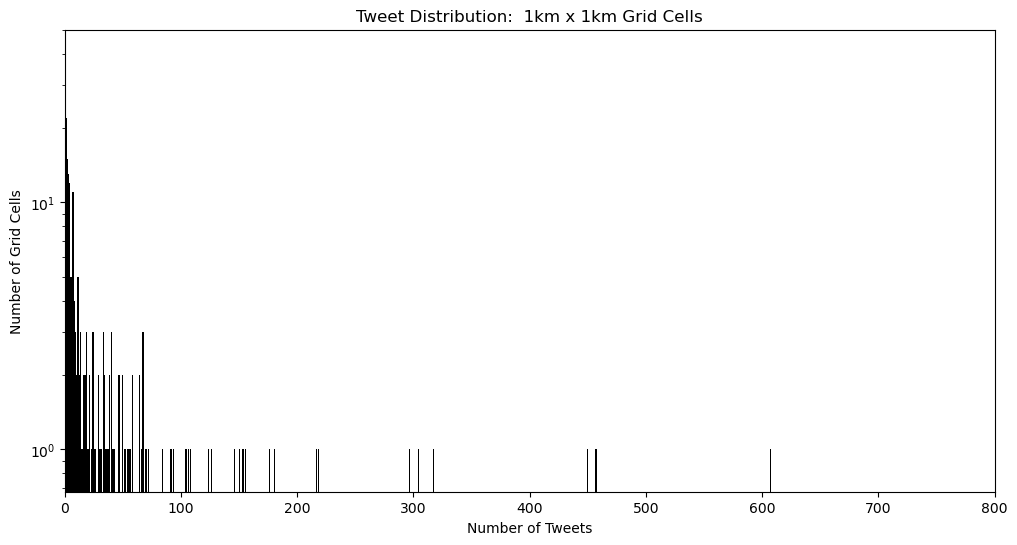

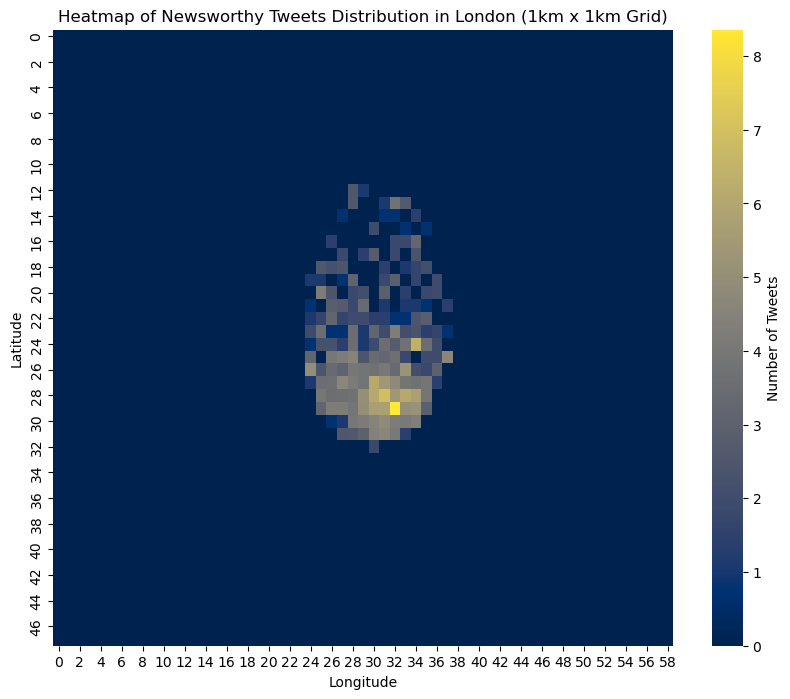

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter newsworthy tweets
newsworthy_tweets = tweets_dataset[tweets_dataset['newsworthiness_score'] > 0.5]

newsworthy_tweets[['longitude', 'latitude']] = newsworthy_tweets['coordinates'].apply(lambda x: pd.Series([x[0], x[1]]))

london_coordinates = [-0.563, 51.261318, 0.28036, 51.686031]

# For generating grid details
rows = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [london_coordinates[0], london_coordinates[3]])).astype(int)
print('Number of rows:' , rows)

columns = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [london_coordinates[2], london_coordinates[1]])).astype(int)
print('Number of columns: ',columns)

noofgrids = int(rows * columns)
print('Number of grids: ',noofgrids)

# Plotting the grid 
grids = np.zeros((rows, columns), dtype = int)

for coordinate in tweets_dfs['coordinates']:
    row_index = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [london_coordinates[0], coordinate[1]])).astype(int)
    col_index = np.ceil(compute_distance([london_coordinates[0], london_coordinates[1]], [coordinate[0], london_coordinates[1]])).astype(int)
    grids[row_index, col_index] += 1
    
no_of_tweets = np.ravel(grids)
grid_col = 'Grid'
no_of_tweets_count = 'Tweets count'
no_of_tweets_dfs = pd.DataFrame({grid_col: np.arange(1, noofgrids + 1), no_of_tweets_count: no_of_tweets}) 

# Visualize the distribution using a histogram
plt.figure(figsize=(12, 6))
plt.hist(no_of_tweets, bins = np.max(no_of_tweets), log = True, color='black')
plt.title('Tweet Distribution:  1km x 1km Grid Cells')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Grid Cells')
plt.ylim(0, 50)
plt.xlim(0, 800)
plt.show()

# Create heatmap of tweet distribution
plt.figure(figsize=(10, 8))
grids_map = np.log(grids, out = np.zeros_like(grids, dtype = float), where = (grids != 0)) 
sns.heatmap(grids_map, cbar_kws={'label': 'Number of Tweets'},cmap='cividis')
plt.title('Heatmap of Newsworthy Tweets Distribution in London (1km x 1km Grid)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

